In [ ]:
import pandas as pd
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.head()
print(dataset[['pregNo','glucose','bp','skin','insulin','bmi','pedigree','age']].describe())

           pregNo     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age  
count  768.000000  768.000000  
mean     0.471876   33.240885  
std      0.331329   11.760232  
min      0.078000   21.000000  
25%      0.243750   24.000000  
50%      0.372500   29.000000  
75%      0.626250   41.000000  
max      2.420

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # for accuracy calculation
from sklearn.metrics import confusion_matrix

dataset = pd.read_csv('pima-indians-diabetes.csv')
print(dataset.head())

# split into feature (independent variables) and target (dependent variables)
feature_columns = ['pregNo','glucose','bp','insulin','bmi','pedigree','age']
X = dataset[feature_columns] # features
Y = dataset['class'] # target variable

#split dataset into training and test set, spliting function will split dataset will have 3 parameters: features, target, test_set size
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

# build a decision tree model using scikit learn
# create decision tree classifier object
clf = DecisionTreeClassifier()

# train decision tree classifier
clf = clf.fit(X_train, y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model (or classifier) for prediction
# Model accuracy, how often is the classifier correct?
print("\n")
print("Accuracy for 70% training set and 30% test set: ", metrics.accuracy_score(y_test,y_pred))

# confusion matrix to evaluate the accuracy of a classification in scikit learn
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

print("true negative: ", tn)
print("false negative: ", fn)
print("true positive: ", tp)
print("false positive: ", fp)

print("# this might not be totally correct ")
# verify accuracy
(tn + tp)/(tn + fn + tp)

print("# like I said it might not be totally correct!")

   pregNo  glucose  bp  skin  insulin   bmi  pedigree  age  class
0       6      148  72    35        0  33.6     0.627   50      1
1       1       85  66    29        0  26.6     0.351   31      0
2       8      183  64     0        0  23.3     0.672   32      1
3       1       89  66    23       94  28.1     0.167   21      0
4       0      137  40    35      168  43.1     2.288   33      1


Accuracy for 70% training set and 30% test set:  0.6753246753246753


[[115  31]
 [ 44  41]]


true negative:  115
false negative:  44
true positive:  41
false positive:  31
# this might not be totally correct 


0.78

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state = 0, max_depth = 2)
dcision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = veriscolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = veriscolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = veriscolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = veriscolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.38461538

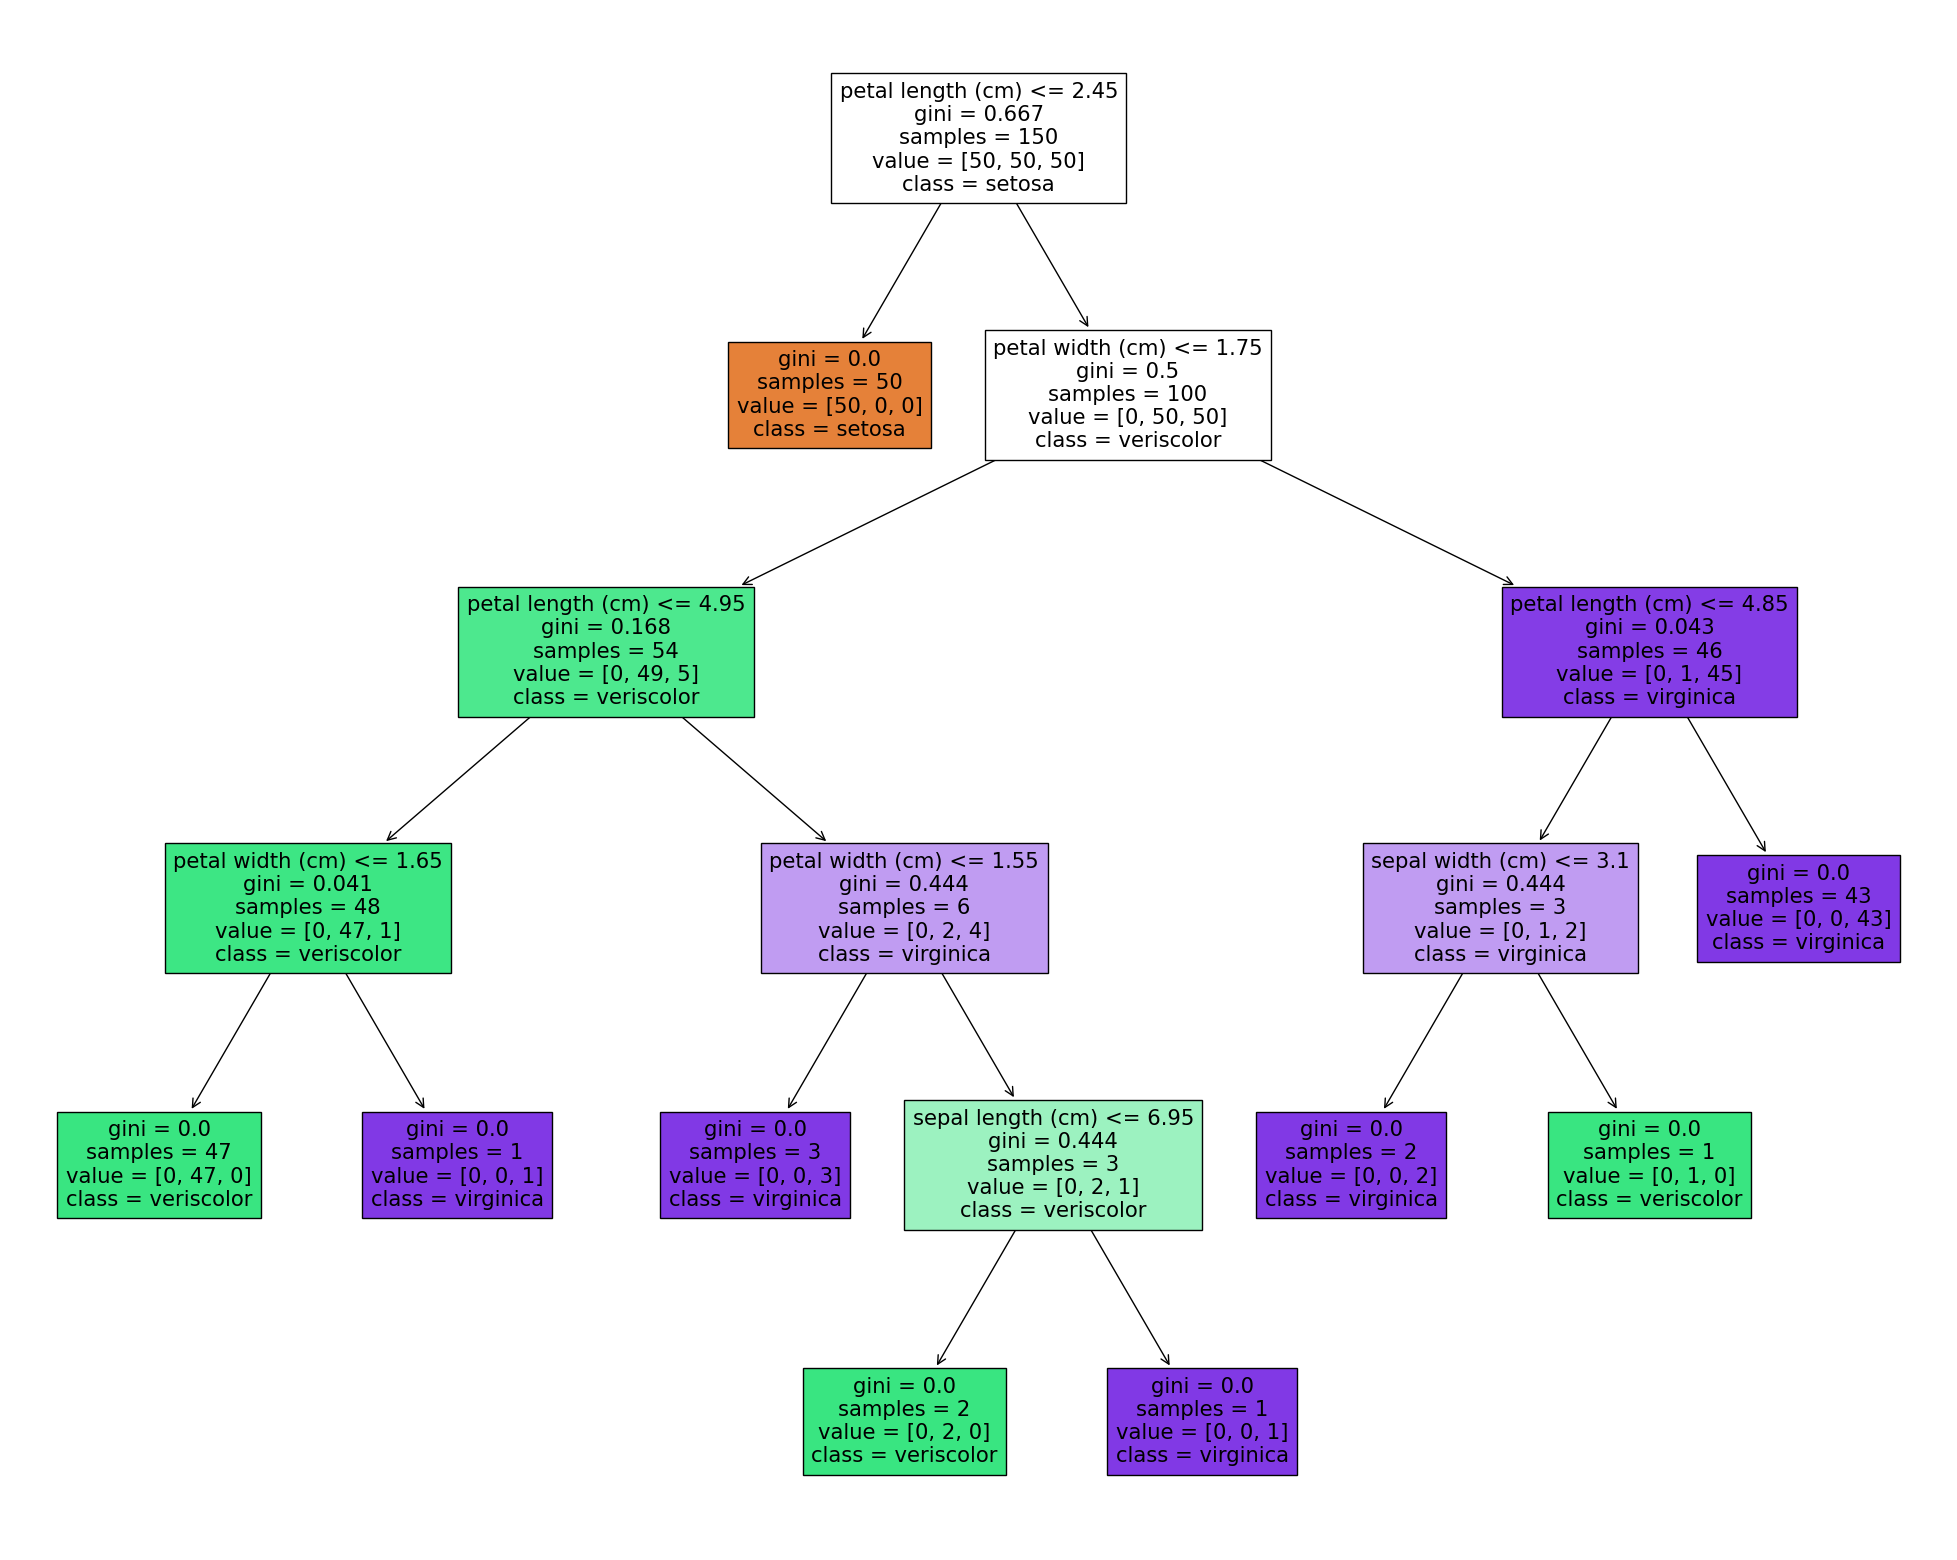

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#prepare the data
iris = datasets.load_iris()
X = iris.data
Y = iris.target

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X,Y)

text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, feature_names=iris.feature_names,class_names=['setosa','veriscolor','virginica'], filled=True)